In [17]:
import pandas as pd

df = pd.read_csv('Data/pollution.csv', index_col = 0)
df.head()

,pollution,dew,temp,pressure,w_dir,w_speed,snow,rain
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [18]:
df.info()   # pollution이 종속변수

<class 'pandas.core.frame.DataFrame'>
Index: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pollution  43800 non-null  float64
 1   dew        43800 non-null  int64  
 2   temp       43800 non-null  float64
 3   pressure   43800 non-null  float64
 4   w_dir      43800 non-null  object 
 5   w_speed    43800 non-null  float64
 6   snow       43800 non-null  int64  
 7   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [19]:
df.boxplot()

<Axes: >

In [20]:
import numpy as np
values = df.values
values

array([[129.0, -16, -4.0, ..., 1.79, 0, 0],
       [148.0, -15, -4.0, ..., 2.68, 0, 0],
       [159.0, -11, -5.0, ..., 3.57, 0, 0],
       ...,
       [10.0, -22, -3.0, ..., 242.7, 0, 0],
       [8.0, -22, -4.0, ..., 246.72, 0, 0],
       [12.0, -21, -3.0, ..., 249.85, 0, 0]], dtype=object)

In [21]:
# w_dir 변수 정수인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
values[:,4] = le.fit_transform(values[:,4])
values = values.astype('float32')
np.unique(values[:,4])

array([0., 1., 2., 3.], dtype=float32)

In [22]:
values[1]

array([ 148.  ,  -15.  ,   -4.  , 1020.  ,    2.  ,    2.68,    0.  ,
          0.  ], dtype=float32)

In [23]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
pd.DataFrame(scaled).boxplot()
plt.show()

AssertionError: 7

In [8]:
df.head(3)

,pollution,dew,temp,pressure,w_dir,w_speed,snow,rain
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0


In [9]:
# shift
def shift(train):
  timestep = 4
  X = []
  y = []
  for i in range(timestep, len(train)):
    X.append(train[i-timestep:i,:]) # pollution ~ rain
    y.append(train[i,0:1]) # pollution
  return X,y

In [ ]:
# timestep
            31 53 24 76 23 29 30         
         31 53 24 76 23 29 30
      31 53 24 76 23 29 30
   31 53 24 76 23 29 30
31 53 24 76 23 29 30
            x: 31 53 24 76 23
            y: 23

In [10]:
len(scaled)

43800

In [11]:
scaled[0:4,:]

array([[0.12977867, 0.35294122, 0.24590163, 0.5272732 , 0.6666667 ,
        0.00229001, 0.        , 0.        ],
       [0.14889336, 0.36764708, 0.24590163, 0.5272732 , 0.6666667 ,
        0.00381099, 0.        , 0.        ],
       [0.15995975, 0.4264706 , 0.22950819, 0.545454  , 0.6666667 ,
        0.00533197, 0.        , 0.        ],
       [0.18209255, 0.48529413, 0.22950819, 0.5636368 , 0.6666667 ,
        0.00839101, 0.03703704, 0.        ]], dtype=float32)

In [12]:
scaled[4,0:1]

array([0.13883299], dtype=float32)

In [13]:
X, y = shift(scaled)
X

[array([[0.12977867, 0.35294122, 0.24590163, 0.5272732 , 0.6666667 ,
         0.00229001, 0.        , 0.        ],
        [0.14889336, 0.36764708, 0.24590163, 0.5272732 , 0.6666667 ,
         0.00381099, 0.        , 0.        ],
        [0.15995975, 0.4264706 , 0.22950819, 0.545454  , 0.6666667 ,
         0.00533197, 0.        , 0.        ],
        [0.18209255, 0.48529413, 0.22950819, 0.5636368 , 0.6666667 ,
         0.00839101, 0.03703704, 0.        ]], dtype=float32),
 array([[0.14889336, 0.36764708, 0.24590163, 0.5272732 , 0.6666667 ,
         0.00381099, 0.        , 0.        ],
        [0.15995975, 0.4264706 , 0.22950819, 0.545454  , 0.6666667 ,
         0.00533197, 0.        , 0.        ],
        [0.18209255, 0.48529413, 0.22950819, 0.5636368 , 0.6666667 ,
         0.00839101, 0.03703704, 0.        ],
        [0.13883299, 0.48529413, 0.22950819, 0.5636368 , 0.6666667 ,
         0.00991199, 0.07407407, 0.        ]], dtype=float32),
 array([[0.15995975, 0.4264706 , 0.22950819, 0

In [14]:
y

[array([0.13883299], dtype=float32),
 array([0.10965794], dtype=float32),
 array([0.1056338], dtype=float32),
 array([0.12474848], dtype=float32),
 array([0.12072434], dtype=float32),
 array([0.13279678], dtype=float32),
 array([0.14084506], dtype=float32),
 array([0.1529175], dtype=float32),
 array([0.14889336], dtype=float32),
 array([0.16498993], dtype=float32),
 array([0.15895371], dtype=float32),
 array([0.15492958], dtype=float32),
 array([0.15995975], dtype=float32),
 array([0.16498993], dtype=float32),
 array([0.17102616], dtype=float32),
 array([0.1498994], dtype=float32),
 array([0.15492958], dtype=float32),
 array([0.16498993], dtype=float32),
 array([0.15694164], dtype=float32),
 array([0.12676056], dtype=float32),
 array([0.09054326], dtype=float32),
 array([0.06338028], dtype=float32),
 array([0.06539235], dtype=float32),
 array([0.05533199], dtype=float32),
 array([0.06539235], dtype=float32),
 array([0.083501], dtype=float32),
 array([0.09154929], dtype=float32),
 array

In [15]:
X = np.array(X)
y = np.array(y)
X

array([[[0.12977867, 0.35294122, 0.24590163, ..., 0.00229001,
         0.        , 0.        ],
        [0.14889336, 0.36764708, 0.24590163, ..., 0.00381099,
         0.        , 0.        ],
        [0.15995975, 0.4264706 , 0.22950819, ..., 0.00533197,
         0.        , 0.        ],
        [0.18209255, 0.48529413, 0.22950819, ..., 0.00839101,
         0.03703704, 0.        ]],

       [[0.14889336, 0.36764708, 0.24590163, ..., 0.00381099,
         0.        , 0.        ],
        [0.15995975, 0.4264706 , 0.22950819, ..., 0.00533197,
         0.        , 0.        ],
        [0.18209255, 0.48529413, 0.22950819, ..., 0.00839101,
         0.03703704, 0.        ],
        [0.13883299, 0.48529413, 0.22950819, ..., 0.00991199,
         0.07407407, 0.        ]],

       [[0.15995975, 0.4264706 , 0.22950819, ..., 0.00533197,
         0.        , 0.        ],
        [0.18209255, 0.48529413, 0.22950819, ..., 0.00839101,
         0.03703704, 0.        ],
        [0.13883299, 0.48529413, 0.2

In [16]:
y

array([[0.13883299],
       [0.10965794],
       [0.1056338 ],
       ...,
       [0.01006036],
       [0.00804829],
       [0.01207243]], dtype=float32)

In [18]:
print(X.shape)
print(y.shape)

(43796, 4, 8)
(43796, 1)


In [19]:
X

array([[[0.12977867, 0.35294118, 0.24590164, ..., 0.00229001,
         0.        , 0.        ],
        [0.14889336, 0.36764706, 0.24590164, ..., 0.00381099,
         0.        , 0.        ],
        [0.15995976, 0.42647059, 0.2295082 , ..., 0.00533197,
         0.        , 0.        ],
        [0.18209256, 0.48529412, 0.2295082 , ..., 0.00839101,
         0.03703704, 0.        ]],

       [[0.14889336, 0.36764706, 0.24590164, ..., 0.00381099,
         0.        , 0.        ],
        [0.15995976, 0.42647059, 0.2295082 , ..., 0.00533197,
         0.        , 0.        ],
        [0.18209256, 0.48529412, 0.2295082 , ..., 0.00839101,
         0.03703704, 0.        ],
        [0.138833  , 0.48529412, 0.2295082 , ..., 0.00991199,
         0.07407407, 0.        ]],

       [[0.15995976, 0.42647059, 0.2295082 , ..., 0.00533197,
         0.        , 0.        ],
        [0.18209256, 0.48529412, 0.2295082 , ..., 0.00839101,
         0.03703704, 0.        ],
        [0.138833  , 0.48529412, 0.2

In [20]:
# 학습용:검증용 8:2 (4년:1년)
n_train= int(len(X)*.2)+1
X_train, X_test = X[n_train:,] , X[:n_train,]
print(X_train.shape, X_test.shape)
y_train, y_test = y[n_train:,] , y[:n_train,]
print(y_train.shape)
print(y_test.shape)

(35036, 4, 8) (8760, 4, 8)
(35036, 1)
(8760, 1)


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
# return_sequences = False 기본값, 마지막 스텝만 내보내는 옵션
# return_sequences = True, 모든 스텝을 내보내는 옵션(LSTM을 여러층으로 만들 경우 사용)
# return_sequences = True 순환 후 1개가 아니라 10개를 다음 스텝으로 보냄. 다음레이어에서 작업하도록 다 보내줌

model.add(Dropout(0.2))
# dropout(0.2) 드롭아웃, 신호의 20%를 랜덤으로 꺼버림 
# hidden1   hidden2
# 64 >>     32개가 아니라 더 적게 전달됨
# 목적: 과적합방지 / 앙상블처럼 데이터의 부트스트랩(부분집합)을 만드는 효과가 있음

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))   # 회귀분석 linear
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 50)             11800     
                                                                 
 dropout (Dropout)           (None, 4, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 4, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [22]:
model.fit(X_train, y_train, validation_split=0.2, epochs = 10, batch_size = 32)

from sklearn.metrics import mean_squared_error
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
rmse

Epoch 1/10
876/876 [==============================] - 16s 12ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 2/10
876/876 [==============================] - 9s 11ms/step - loss: 0.0014 - val_loss: 5.8395e-04
Epoch 3/10
876/876 [==============================] - 9s 10ms/step - loss: 0.0010 - val_loss: 5.2597e-04
Epoch 4/10
876/876 [==============================] - 10s 11ms/step - loss: 9.4768e-04 - val_loss: 6.1586e-04
Epoch 5/10
876/876 [==============================] - 9s 11ms/step - loss: 9.1303e-04 - val_loss: 5.6362e-04
Epoch 6/10
876/876 [==============================] - 10s 11ms/step - loss: 8.8608e-04 - val_loss: 5.1305e-04
Epoch 7/10
876/876 [==============================] - 10s 11ms/step - loss: 8.7952e-04 - val_loss: 6.0595e-04
Epoch 8/10
876/876 [==============================] - 9s 10ms/step - loss: 8.7505e-04 - val_loss: 5.3173e-04
Epoch 9/10
876/876 [==============================] - 9s 10ms/step - loss: 8.6246e-04 - val_loss: 5.8056e-04
Epoch 10/10
274/274 [==========

0.03117659798779937

In [23]:
d = scaled[:n_train,:]
y_predicted = np.concatenate((pred,d[:n_train,1:]), axis =1)
y_tested = np.concatenate((y_test, d[:n_train,1:]), axis = 1)
y_predicted = scaler.inverse_transform(y_predicted)
y_tested = scaler.inverse_transform(y_tested)
y_predicted = y_predicted[:,0:1]
y_tested = y_tested[:,0:1]

In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_tested, y_predicted)
rmse = np.sqrt(mse)
print('MSE' , mse)
print('RMSE' , np.sqrt(rmse))

MSE 960.3514902371764
RMSE 5.566824804129601


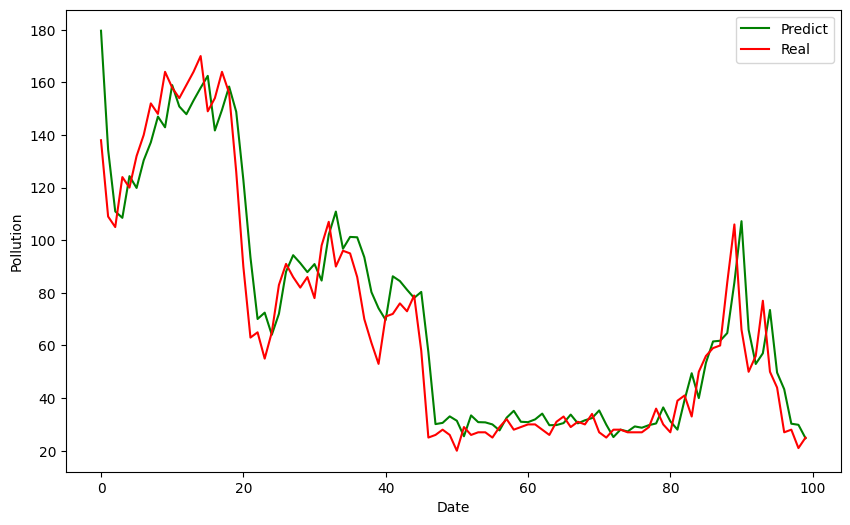

In [26]:
plt.figure(figsize=(10,6))
plt.plot(y_predicted[:100,:], color= 'g',label = 'Predict')
plt.plot(y_tested[:100,:] , color = 'r',label = 'Real')
plt.xlabel("Date")
plt.ylabel("Pollution")
plt.legend()
plt.show()
